In [ ]:
### Importing the Data into a pandas datafram. Also Importing Numpy & Matlab

In [139]:
import pandas as pd
Tdf = pd.read_csv("../Data/Clean_Teams_Data.csv")
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
### What is the mean number of 

In [140]:
### Plotting Errors and Wins
### Assuming The number of errors drives the variable "Wins" (Wins are the dependent variable)

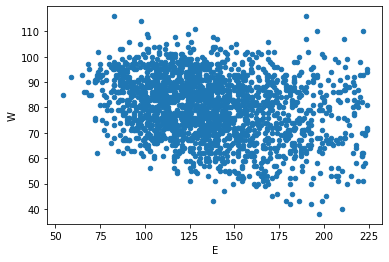

In [141]:
Tdf.plot(kind = 'scatter', x = 'E', y = 'W')
plt.show()

In [142]:
### There appears to be a negative relationship between the number of errors and wins.
### Adding a regression line will tell if that is true

In [143]:
### First, I find the intercept and slope.

In [144]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
X = Tdf[['E']]
y = Tdf.W
lr.fit(X, y)


print(lr.intercept_, lr.coef_)


92.90299574917515 [-0.09503348]


In [145]:
### Our Intercept is about 93 and our slope is about -.095. 
### I will plot this line on the graph using 

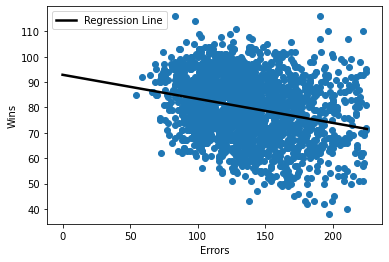

In [146]:
plt.scatter(Tdf.E, Tdf.W)
#fit function
f = lambda x: -0.09503348*x + 92.90299574917515
# x values of line to plot
x = np.array([0,225])
# plot fit
plt.plot(x,f(x),lw=2.5, c="k",label="Regression Line")

plt.xlabel("Errors")
plt.ylabel("Wins")


plt.legend()
plt.show()


In [147]:
### From the graph above we see there is negative relationship between the number of erros and the number of wins.

### To find out how strength of the relationship, I calculate the R squared score

In [148]:
lr.score(X, y)

0.06522843831389757

In [149]:
### The R Squared score is low at 6.5%
### Adding context, let's see if Runs and wins has a stronger relationship and R Square score

In [150]:
lr1 = LinearRegression()
X = Tdf[['R']]
y = Tdf.W
lr1.fit(X, y)

print(lr1.intercept_, lr1.coef_)
lr1.score(X, y)

30.49366515134573 [0.06972548]


0.2939148431054036

In [151]:
### Relationship between runs and wins shows a positive slope score and the higher R Square score.
### The positive slope (coefficient) indicates that runs have a positive relationship with wins.
### The higher R Square score indicates there is less variance between the points and the regression line.

In [152]:
### I use the Statsmodel api to get more statistics on the relationship between errors and wins

In [153]:
X = Tdf[['E'] ]
y = Tdf['W']
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     139.7
Date:                Wed, 28 Oct 2020   Prob (F-statistic):           3.29e-31
Time:                        15:15:46   Log-Likelihood:                -7832.8
No. Observations:                2004   AIC:                         1.567e+04
Df Residuals:                    2002   BIC:                         1.568e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         92.9030      1.128     82.342      0.000      90.690      95.116
E             -0.0950      0.008    -11.819      0.000      -0.111      -0.079
==============================================================================
Omnibus:                       13.807   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               11.584
Skew:                          -0.117   Prob(JB):                      0.00305
Kurtosis:                       2.710   Cond. No.                         588.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [154]:
### The R-squared shows that less than 7% of intitial varance for Wins can be explained by this linear model. 
### The F statistic is so high that I can't concluide there is a relationship between errors and wins, So Errors aren't a very good of the number of wins. 


In [155]:
### To improve my model I add more variables (Runs, Earned Runs, and Stolen Bases) and perform linear aggression analysis

In [156]:

X = Tdf[['E','R','ER','SB'] ]
y = Tdf['W']
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     3545.
Date:                Wed, 28 Oct 2020   Prob (F-statistic):               0.00
Time:                        15:15:47   Log-Likelihood:                -5805.1
No. Observations:                2004   AIC:                         1.162e+04
Df Residuals:                    1999   BIC:                         1.165e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         87.4498      1.060     82.496      0.000      85.371      89.529
E             -0.1014      0.003    -33.659      0.000      -0.107      -0.095
R              0.0969      0.001     89.422      0.000       0.095       0.099
ER            -0.1023      0.001    -92.823      0.000      -0.105      -0.100
SB             0.0192      0.002      8.416      0.000       0.015       0.024
==============================================================================
Omnibus:                        3.012   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.222   Jarque-Bera (JB):                3.070
Skew:                          -0.087   Prob(JB):                        0.215
Kurtosis:                       2.921   Cond. No.                     1.05e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
### Using these 4 variables, there is a much higher R-squared (and more importantly Adjusted R-Square) score which indicates that 89.5% of the intitial variance for wins can be explained by this model.
### Additionally the f-statistic is 0, meaning we can conclude that one of these variables has a relationship with Wins.
### We notice that runs and stolen bases has a positive relationship (Coeficient) with Wins, and ERA and Errors have a negative relationship.

In [ ]:
### Based on this model, we can expect a lower Earned Runs to result in more wins than any other variable used. 
### Since Earned Runs is a pitching statistic, it appears pitching may be the most important predictor to Wins.
### Note that Errors has a large coeficeint, but based on early analysis we can't conclude that the relationship only between Errors and Wins are very strong. 